<a href="https://colab.research.google.com/github/Minecka2023/MB_Minetska_3-14/blob/main/LB4_MB_Minetska_3_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*текст курсивом*

### Завдання №1

* Завантажте з репозиторію дані (лінк)

`url = "https://archive.ics.uci.edu   "`

* задайте відповідні до вмісту імена колонок датафрейму:
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$ та цільової змінної/класу $Y$
* виведіть кількість елементів у кожному класі
* поділіть вибірку на навчальну та тестову у співвідношенні 30/70
* Варіанти датасетів наведені в таблиці


In [4]:
import pandas as pd

column_names = [
    "letter", "x-box", "y-box", "width", "high", "onpix", "x-bar",
    "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege",
    "xegvy", "y-ege", "yegvx"
]

letter_data = pd.read_csv('letter-recognition.data', header=None, names=column_names)

letter_data.head(), letter_data.describe()


(  letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
 0      T      2      8      3     5      1      8     13      0      6      6   
 1      I      5     12      3     7      2     10      5      5      4     13   
 2      D      4     11      6     8      6     10      6      2      6     10   
 3      N      7     11      6     6      3      5      9      4      6      4   
 4      G      2      1      3     1      1      8      6      6      6      6   
 
    x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
 0     10      8      0      8      0      8  
 1      3      9      2      8      4     10  
 2      3      7      3      7      3      9  
 3      4     10      6     10      2      8  
 4      5      9      1      7      5     10  ,
               x-box         y-box         width         high         onpix  \
 count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
 mean       4.023550      7.035500      5.121850      5.37245    

In [8]:
from sklearn.model_selection import train_test_split

X = letter_data.drop('letter', axis=1)
Y = letter_data['letter']

class_counts = Y.value_counts()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

class_counts, X_train.shape, X_test.shape

(letter
 U    813
 D    805
 P    803
 T    796
 M    792
 A    789
 X    787
 Y    786
 N    783
 Q    783
 F    775
 G    773
 E    768
 B    766
 V    764
 L    761
 R    758
 I    755
 O    753
 W    752
 S    748
 J    747
 K    739
 C    736
 H    734
 Z    734
 Name: count, dtype: int64,
 (14000, 16),
 (6000, 16))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 1.03482705,  1.19459488,  0.93394799,  1.5909272 , -0.23164489,
         0.05721274, -0.21629316,  3.8047636 , -1.32952638, -1.72508742,
        -0.17746411,  0.03196868,  1.26737082, -0.22386001, -1.43796432,
         0.12609094],
       [-1.06193519, -0.01781814, -1.05287344, -0.61191928, -0.68911822,
        -0.93043014,  1.07427551,  1.23156457, -0.49201061, -0.51899364,
        -0.94180732,  0.51013264, -0.0190513 , -0.87272959,  0.51215778,
         1.98166884],
       [ 2.60739874,  0.89149162,  1.9273587 ,  1.1503579 ,  0.68330177,
        -0.93043014, -0.21629316,  0.49636484,  1.60177883,  0.28506888,
         0.58687909,  0.51013264,  0.83856345,  1.72274875,  0.51215778,
        -3.58506488],
       [ 0.51063649, -0.62402465, -0.05946273,  0.70978861, -0.23164489,
         0.05721274,  0.21389639,  3.8047636 , -1.74828427, -0.51899364,
        -0.55963571,  0.03196868, -0.0190513 , -0.22386001, -1.43796432,
         0.12609094],
       [-0.53774463, -0.62402465, -0

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

configurations = [
    (3, 'euclidean'), (3, 'manhattan'),
    (5, 'euclidean'), (5, 'manhattan')
]
results = []

for k, metric in configurations:
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train_scaled, Y_train)
    Y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)
    results.append((k, metric, accuracy))

results

[(3, 'euclidean', 0.9405),
 (3, 'manhattan', 0.9446666666666667),
 (5, 'euclidean', 0.9405),
 (5, 'manhattan', 0.946)]

### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм kNN для $k=3$, $k=5$, використовуючи евклідову метрику та манхеттенську метрику
* порівняйте результати точності для цих моделей
* визначіть оптимальне $k$ за допомогою `GridSearchCV`
* зробіть висновки


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid: k values and metrics
param_grid = {'n_neighbors': list(range(1, 10)), 'metric': ['euclidean', 'manhattan']}

# Create the kNN model
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'metric': 'euclidean', 'n_neighbors': 1}, 0.9425714285714285)

### Завдання №3

* Проведіть стандартизацію даних
* застосуйте алгоритм дерева рішень з критерієм `entropy`
* візуалізуйте дерево
* оцініть точність класифікації
* застосуйте алгоритм дерева рішень з критерієм `gini`
* візуалізуйте дерево
* оцініть точність класифікації
* визначіть оптимальну кількість характеристик в моделі та глибину дерева за допомогою `GridSearchCV`
* зробіть висновки

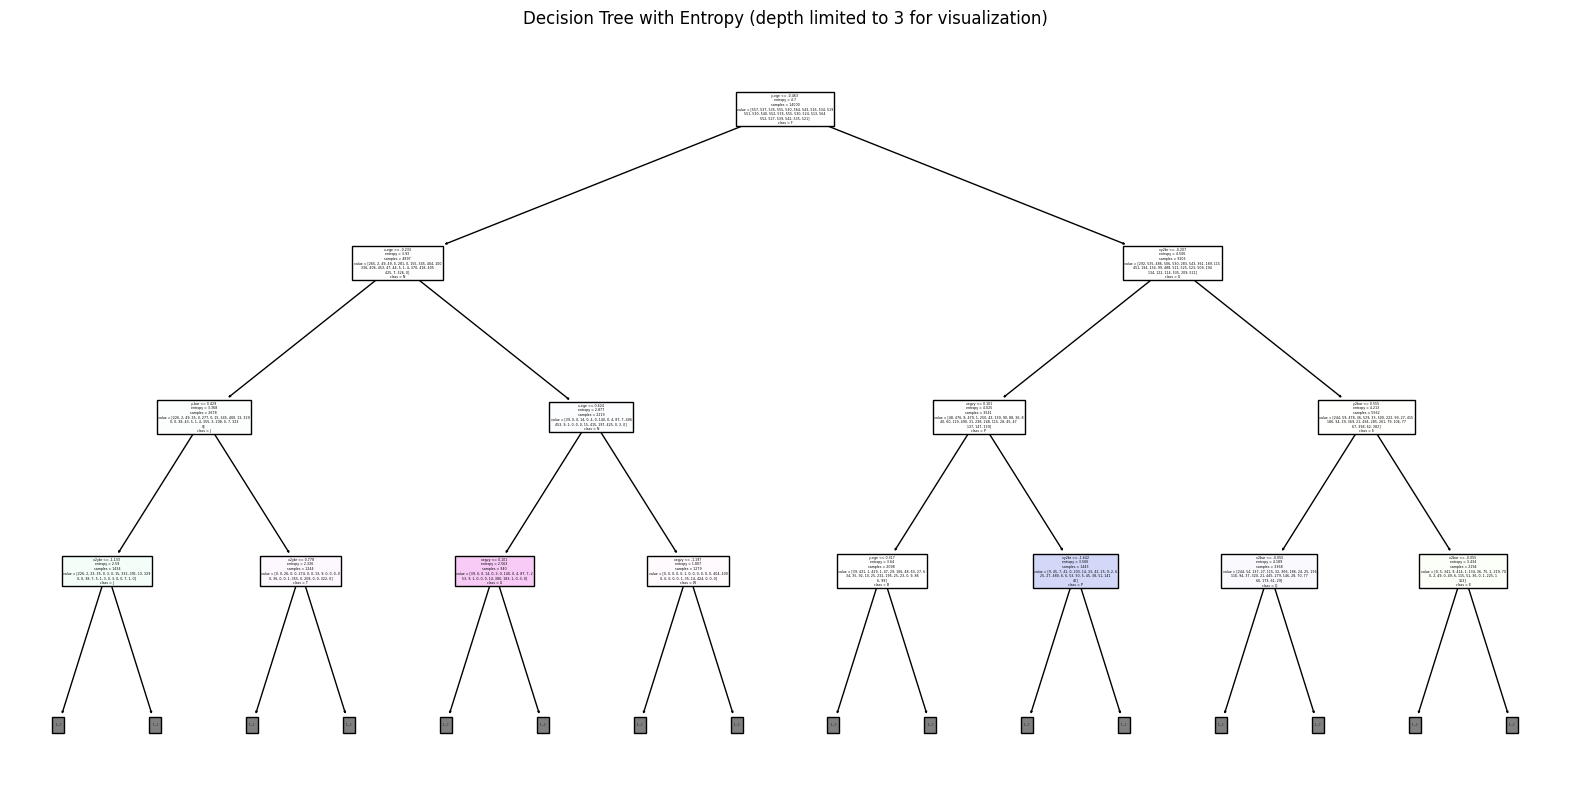

0.877

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_entropy.fit(X_train_scaled, Y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, filled=True, max_depth=3, feature_names=column_names[1:], class_names=sorted(Y.unique()))
plt.title('Decision Tree with Entropy (depth limited to 3 for visualization)')
plt.show()

entropy_accuracy = dt_entropy.score(X_test_scaled, Y_test)
entropy_accuracy

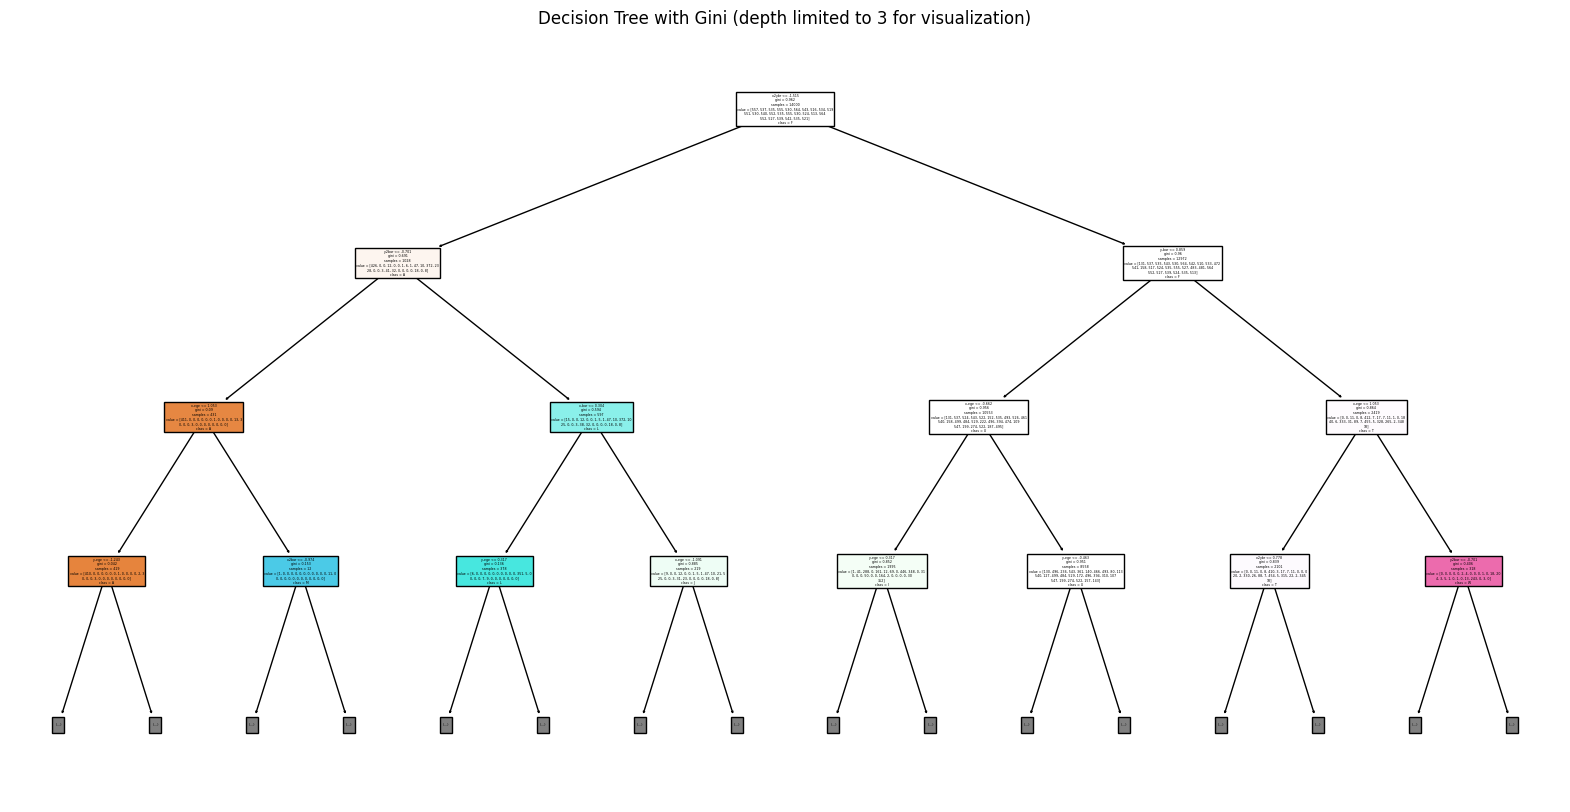

0.8748333333333334

In [13]:
# Create a Decision Tree classifier with gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
dt_gini.fit(X_train_scaled, Y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, filled=True, max_depth=3, feature_names=column_names[1:], class_names=sorted(Y.unique()))
plt.title('Decision Tree with Gini (depth limited to 3 for visualization)')
plt.show()

# Evaluate the accuracy on the test set
gini_accuracy = dt_gini.score(X_test_scaled, Y_test)
gini_accuracy

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'max_features': range(1, 17)
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train_scaled, Y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

best_params_dt, best_score_dt

({'criterion': 'entropy', 'max_depth': 18, 'max_features': 16},
 0.8582857142857143)

### Завдання №4

Порівняйте результати класифікації методами kNN та дерева рішень для заданого набору даних

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = data.drop('letter', axis=1).values
y = LabelEncoder().fit_transform(data['letter'])

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
dtc = DecisionTreeClassifier(max_depth=18, criterion='entropy')

n_splits = 30

knn_scores = cross_val_score(knn, X, y, cv=n_splits)
dtc_scores = cross_val_score(dtc, X, y, cv=n_splits)

knn_mean_accuracy = np.mean(knn_scores)
dtc_mean_accuracy = np.mean(dtc_scores)

knn_mean_accuracy, dtc_mean_accuracy, knn_scores, dtc_scores



In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(knn_scores, dtc_scores)

stat, p_value

### Завдання №5

* застосуйте алгоритм LR, використовуючи `solver='liblinear'`,`solver='newton-cg'` та `solver='lbfgs'`
* порівняйте результати роботи різних оптимізаторів оціночними критиеріями
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

solvers = ['liblinear', 'newton-cg', 'lbfgs']

models = {}
accuracies = {}
confusion_matrices = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, multi_class='auto', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    models[solver] = model
    accuracies[solver] = accuracy_score(y_test, y_pred)
    confusion_matrices[solver] = confusion_matrix(y_test, y_pred)

accuracies


NameError: name 'y' is not defined

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
solvers_titles = ['liblinear', 'newton-cg', 'lbfgs']

for i, solver in enumerate(solvers_titles):

    sns.heatmap(confusion_matrices[solver], annot=True, fmt='d', ax=axes[i], cmap='Blues', cbar=False)
    axes[i].set_title(f'Confusion Matrix: {solver}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')


plt.tight_layout()
plt.show()

### Завдання №6

* Застосуйте алгоритм SVM з ядром `rbf`, `linear` та `sigmoid`
* порівняйте результати роботи різних перетворень функцій ядер оціночними критеріями
* побудуйте багатокласову матрицю невідповідностей, та інтерпретуйте її результати
* зробіть висновки

In [ ]:
from sklearn.svm import SVC

kernels = ['rbf', 'linear', 'sigmoid']

svm_models = {}
svm_accuracies = {}
svm_confusion_matrices = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train, y_train)  # Використання зменшеної вибірки для тренування
    y_pred = svm_model.predict(X_test)

    svm_models[kernel] = svm_model
    svm_accuracies[kernel] = accuracy_score(y_test, y_pred)
    svm_confusion_matrices[kernel] = confusion_matrix(y_test, y_pred)

svm_accuracies

### Завдання №7

* Порівняйте результати класифікації методами, kNN, дерева рішень, LR, SVM для заданого набору даних
* оберіть найкращий метод класифікації, обгрунтуйте ваше рішення



In [ ]:
#На основі отриманих результатів, **kNN** є найкращим вибором для класифікації даного набору даних через найвищу точність.
#Це робить його ідеальним для випадків, де важлива висока точність і де витрати на
#обчислення (які можуть бути значними для kNN через необхідність обчислювати відстані до всіх точок у тренувальному наборі даних при кожному запиті) є прийнятними.
#У випадку великих датасетів або реальних додатків, де час відгуку є критичним,
#можуть бути кращі SVM з rbf ядром через їхню здатність ефективно працювати з нелінійними розподілами.